<a href="https://colab.research.google.com/github/vblancoOR/econometria/blob/main/Multicolinealidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:

import pandas as pd #librería para manejo de datos

datos= pd.read_csv("https://rtgodwin.com/data/houseprice.csv") #Lee base de datos de web...
datos

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
0,132500,0.09,0,42,50000,0,0,Electric,Electric,Private,906,35,2,1,1.0,5
1,181115,0.92,0,0,22300,0,0,Gas,Hot Water,Private,1953,51,3,0,2.5,6
2,109000,0.19,0,133,7300,0,0,Gas,Hot Water,Public,1944,51,4,1,1.0,8
3,155000,0.41,0,13,18700,0,0,Gas,Hot Air,Private,1944,51,3,1,1.5,5
4,86060,0.11,0,0,15000,1,1,Gas,Hot Air,Public,840,51,2,0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,0,32,24200,0,0,Gas,Hot Water,Public,2310,61,5,1,2.5,11
1724,285000,0.94,0,37,36200,0,0,Gas,Hot Water,Public,2564,61,4,1,2.5,11
1725,194900,0.39,0,9,20400,0,0,Gas,Hot Air,Public,1099,51,2,0,1.0,3
1726,125000,0.24,0,48,16800,0,0,Gas,Hot Air,Public,1225,51,3,1,1.0,7


In [18]:
# apply normalization technique to Column 1
column = 'Lot.Size'
datos[column+"_N"] = (datos[column] -datos[column].mean()) /datos[column].std()
column = 'Age'
datos[column+"_N"] = (datos[column] -datos[column].mean()) /datos[column].std()
column = 'Land.Value'
datos[column+"_N"] = (datos[column] -datos[column].mean()) /datos[column].std()
column = 'Bedrooms'
datos[column+"_N"] = (datos[column] -datos[column].mean()) /datos[column].std()
column = 'Price'
datos[column+"_N"] = (datos[column] -datos[column].mean()) /datos[column].std()
datos

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,...,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Lot.Size_N,Age_N,Land.Value_N,Bedrooms_N,Price_N
0,132500,0.09,0,42,50000,0,0,Electric,Electric,Private,...,35,2,1,1.0,5,-0.587127,0.482161,0.440957,-1.412506,-0.807249
1,181115,0.92,0,0,22300,0,0,Gas,Hot Water,Private,...,51,3,0,2.5,6,0.600827,-0.955703,-0.349994,-0.189042,-0.313402
2,109000,0.19,0,133,7300,0,0,Gas,Hot Water,Public,...,51,4,1,1.0,8,-0.444000,3.597534,-0.778306,1.034422,-1.045970
3,155000,0.41,0,13,18700,0,0,Gas,Hot Air,Private,...,51,3,1,1.5,5,-0.129121,-0.510650,-0.452789,-0.189042,-0.578687
4,86060,0.11,0,0,15000,1,1,Gas,Hot Air,Public,...,51,2,0,1.0,3,-0.558502,-0.955703,-0.558439,-1.412506,-1.279002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,0,32,24200,0,0,Gas,Hot Water,Public,...,61,5,1,2.5,11,-0.172059,0.139812,-0.295741,2.257886,0.782530
1724,285000,0.94,0,37,36200,0,0,Gas,Hot Water,Public,...,61,4,1,2.5,11,0.629453,0.310987,0.046909,1.034422,0.741896
1725,194900,0.39,0,9,20400,0,0,Gas,Hot Air,Public,...,51,2,0,1.0,3,-0.157746,-0.647590,-0.404247,-1.412506,-0.173369
1726,125000,0.24,0,48,16800,0,0,Gas,Hot Air,Public,...,51,3,1,1.0,7,-0.372437,0.687570,-0.507042,-0.189042,-0.883436


In [19]:
import statsmodels.api as sm

y=datos["Price_N"]
X=datos[['Lot.Size_N', 'Age_N', 'Land.Value_N', 'Bedrooms_N']]

mco = sm.OLS(y, sm.add_constant(X)).fit()
print(mco.summary())

                            OLS Regression Results                            
Dep. Variable:                Price_N   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 12 Nov 2024   Prob (F-statistic):          2.18e-231
Time:                        09:04:23   Log-Likelihood:                -1912.8
No. Observations:                1728   AIC:                             3836.
Df Residuals:                    1723   BIC:                             3863.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6.072e-18      0.018   3.44e-16   

# Número de Condición

In [20]:
import numpy as np

np.sqrt(mco.condition_number)

1.1266392008508077

In [21]:
import numpy as np

CN = np.sqrt(mco.condition_number) #Número de Condición
print(CN)

1.1266392008508077


# Factor de Inflación de la Varianza

In [22]:
import statsmodels.stats.outliers_influence as oi

vifs=[oi.variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vifs

[1.0149130496483105, 1.001860918467013, 1.0449513397076355, 1.0554313309051424]

# Matriz de Correlaciones

In [23]:
corr_matrix=np.corrcoef(X.T)
print(corr_matrix)

[[ 1.         -0.01635219  0.05922184  0.11398209]
 [-0.01635219  1.         -0.0218179   0.0271248 ]
 [ 0.05922184 -0.0218179   1.          0.20244922]
 [ 0.11398209  0.0271248   0.20244922  1.        ]]


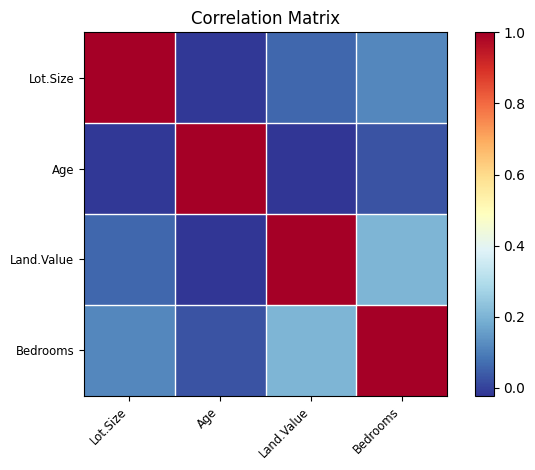

In [24]:
import statsmodels.graphics.api as smg
import matplotlib.pylab as plt
smg.plot_corr(corr_matrix, xnames=['Lot.Size', 'Age', 'Land.Value',  'Bedrooms'])
plt.show()